In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange

random_state = np.random.get_state()

In [2]:
class Bandit(object):
    def __init__(self, k_arm=10, epsilon=0.0):
        self.k_arm = k_arm
        self.epsilon = epsilon
        self.action_indices = np.arange(self.k_arm, dtype=np.int)

    def reset(self):
        self.q_true = np.random.normal(loc=0, scale=1, size=self.k_arm)
        self.q_estimation = np.zeros(self.k_arm)
        self.time_step = 0
        self.action_count = np.zeros(self.k_arm)
        self.best_action = np.argmax(self.q_true)
    
    def act(self):
        if np.random.random_sample() < self.epsilon:
            return np.random.choice(self.action_indices)

        q_best = np.max(self.q_estimation)
        return np.random.choice(np.where(self.q_estimation == q_best)[0])
    
    def step(self, action):
        reward = np.random.normal(loc=self.q_true, scale=1)[action]

        self.time_step += 1
        self.action_count[action] += 1
        self.q_estimation[action] = self.q_estimation[action] + (reward - self.q_estimation[action]) / self.action_count[action]
        return reward

In [3]:
def simulate(runs, time, bandits):
    rewards = np.zeros((len(bandits), runs, time))
    best_action_count = np.zeros(rewards.shape)

    for i, bandit in enumerate(bandits):
        np.random.set_state(random_state)
        for r in trange(runs, desc="{} epsilon".format(bandit.epsilon)):
            bandit.reset()
            for t in range(time):
                action = bandit.act()
                reward = bandit.step(action)
                rewards[i, r, t] = reward

                if action == bandit.best_action:
                    best_action_count[i, r, t] = 1

    mean_rewards = rewards.mean(axis=1)
    mean_best_action_count = best_action_count.mean(axis=1)
    return mean_rewards, mean_best_action_count

In [4]:
def figure_2_1():
    np.random.set_state(random_state)
    plt.violinplot(dataset=np.random.normal(loc=0, scale=1, size=10) + np.random.randn(200, 10))
    plt.xlabel("Action")
    plt.ylabel("Reward distribution")
    plt.show()

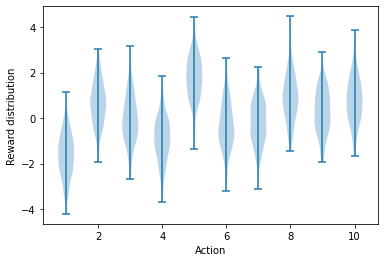

In [5]:
figure_2_1()

In [6]:
def figure_2_2(runs=2000, time=1000):
    epsilons = [0, 0.1, 0.01]
    bandits = [Bandit(epsilon=eps) for eps in epsilons]
    mean_rewards, mean_best_action_count = simulate(runs, time, bandits)

    plt.figure(figsize=(10, 20))
    plt.subplot(2, 1, 1)
    for eps, reward in zip(epsilons, mean_rewards):
        plt.plot(reward, label="epsilon = {:.02f}".format(eps))
    plt.xlabel("steps")
    plt.ylabel("average reward")
    plt.legend()

    plt.subplot(2, 1, 2)
    for eps, counts in zip(epsilons, mean_best_action_count):
        plt.plot(counts, label="epsilon = {:.02f}".format(eps))
    plt.xlabel("steps")
    plt.ylabel("% optimal action")
    plt.ylim((0, 1))
    plt.legend()

    plt.show()

0.01 epsilon: 100%|██████████| 2000/2000 [12:01<00:00,  2.77it/s]


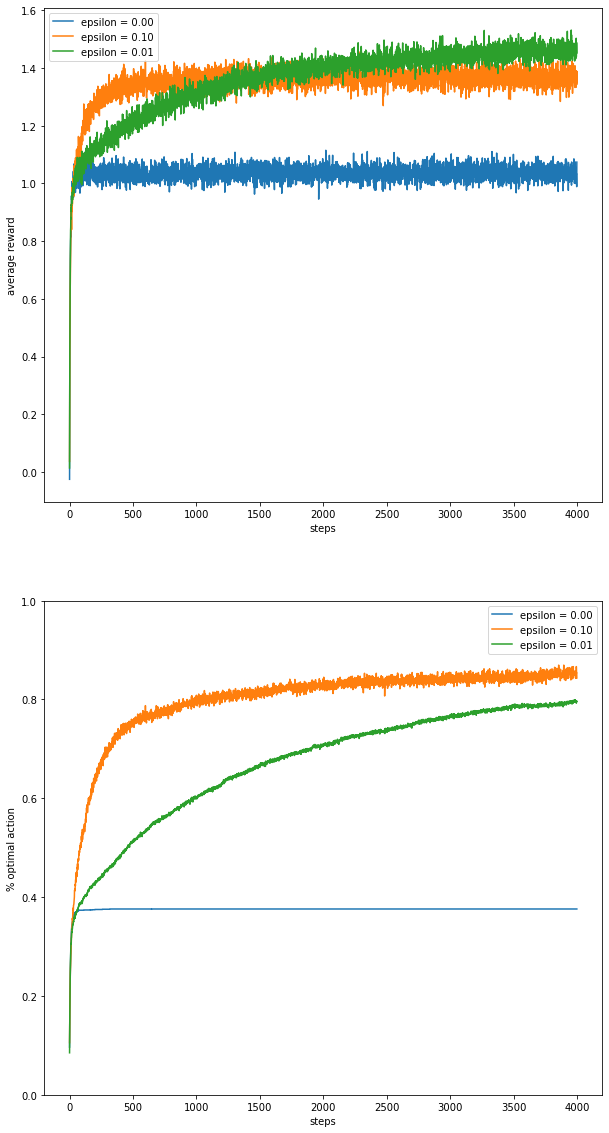

In [7]:
figure_2_2(time=4000)